## Load the file

In [3]:
import pandas as pd
career_link = pd.read_csv(r'E:\COLLEGE\PROJECT\career_link_processed.csv')
career_link.shape

(21219, 105)

In [4]:
career_link.columns

Index(['Job Title', 'Company', 'Company Link', 'City', 'Province or District',
       'Salary Type', 'Undefined Salary Type', 'Salary Start', 'Salary End',
       'Currency Unit',
       ...
       'Industry_Nội thất / Ngoại thất', 'Industry_Bảo hiểm',
       'Industry_Môi trường / Xử lý chất thải', 'Industry_Tiếp thị',
       'Industry_Quản lý chất lượng (QA / QC)', 'Industry_An Ninh / Bảo Vệ',
       'Industry_Giáo dục / Đào tạo / Thư viện', 'Industry_An Toàn Lao Động',
       'Industry_Sản xuất / Vận hành sản xuất',
       'Industry_Nông nghiệp / Lâm nghiệp'],
      dtype='object', length=105)

# EDA

## Try drawing plots for salary ranges based on keywords searched in job titles

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

def plot_salary_ranges(filtered_jobs, keyword):
    # Filter the DataFrame based on 'Salary Type' and 'Currency Unit' conditions
    
    lower_limits = filtered_jobs['Salary Start']
    upper_limits = filtered_jobs['Salary End']

    ########################################
    ####### RESPONSIVE FIGURE SIZE #########
    ########################################
    total_values = len(upper_limits)

    min_figure_size = (6, 4) 
    max_figure_size = (12, 6)  

    def calculate_figure_size(total_values, min_size, max_size):
        # Adjust these factors as needed
        factor = total_values / 30  # You can adjust the threshold (30) as needed
        factor = max(0.5, min(factor, 2.0))  # Ensure the factor stays within a reasonable range
        return (min_size[0] + factor * (max_size[0] - min_size[0]), min_size[1] + factor * (max_size[1] - min_size[1]))

    fig_size = calculate_figure_size(total_values, min_figure_size, max_figure_size)

    plt.figure(figsize=fig_size)
    #############################

    # Create an array of job listing indices for plotting
    job_indices = np.arange(len(lower_limits))

    # Calculate the width of the bars
    bar_width = 0.3

    plt.barh(
        job_indices,
        upper_limits,
        height=bar_width,
        alpha=0.5
    )
    if total_values <= 30:
        plt.scatter(
            upper_limits,
            job_indices,
            marker='o',
            color='black',
            alpha=0.5,
            s=10,
            zorder=3
        )

    plt.barh(
        job_indices,
        lower_limits,
        height=bar_width,
        color='white',
        alpha=1
    )

    if total_values <= 30:
        plt.scatter(
            lower_limits,
            job_indices,
            marker='o',
            color='black',
            alpha=0.5,
            s=10,
            zorder=3
        )

    plt.xlabel('Salary (VND)')
    plt.title(f'Salary Ranges for Jobs with the keyword {keyword}')
    plt.yticks([])
    plt.grid(axis='x')

    total_values = len(upper_limits)

    # Display data values only if there are fewer than 30 values on the chart
    if total_values < 30:
        for i, (x, y) in enumerate(zip(upper_limits, job_indices)):
            if not np.isnan(x):
                plt.annotate(f'{int(x/1e6)}M', (x, y), textcoords="offset points", xytext=(15, 0), ha='center')

        for i, (x, y) in enumerate(zip(lower_limits, job_indices)):
            if not np.isnan(x):
                plt.annotate(f'{int(x/1e6)}M', (x, y), textcoords="offset points", xytext=(-15, 0), ha='center')


    # Customize the x-axis tick labels to display values in millions
    million_formatter = mtick.FuncFormatter(lambda x, _: f'{int(x/1e6)} million')
    plt.gca().xaxis.set_major_formatter(million_formatter)

    plt.tight_layout()
    plt.show()

# Call the function with the filtered DataFrame


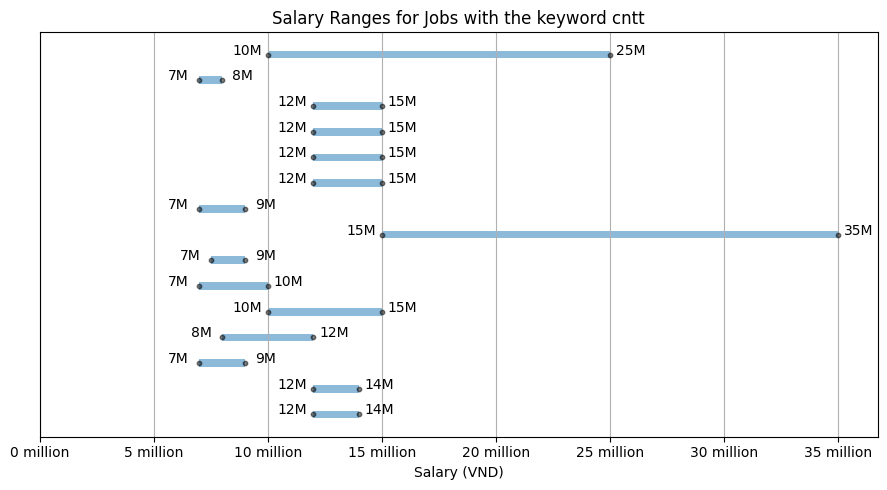

In [5]:
keyword = 'cntt'
hue = 'City'
%matplotlib inline
filtered_jobs = career_link[(career_link['Salary Type'] == 'Defined') & (career_link['Currency Unit'] == 'VND')]
filtered_jobs = filtered_jobs[filtered_jobs['Job Title'].str.contains(keyword, case=False, na=False)]
plot_salary_ranges(filtered_jobs, keyword)

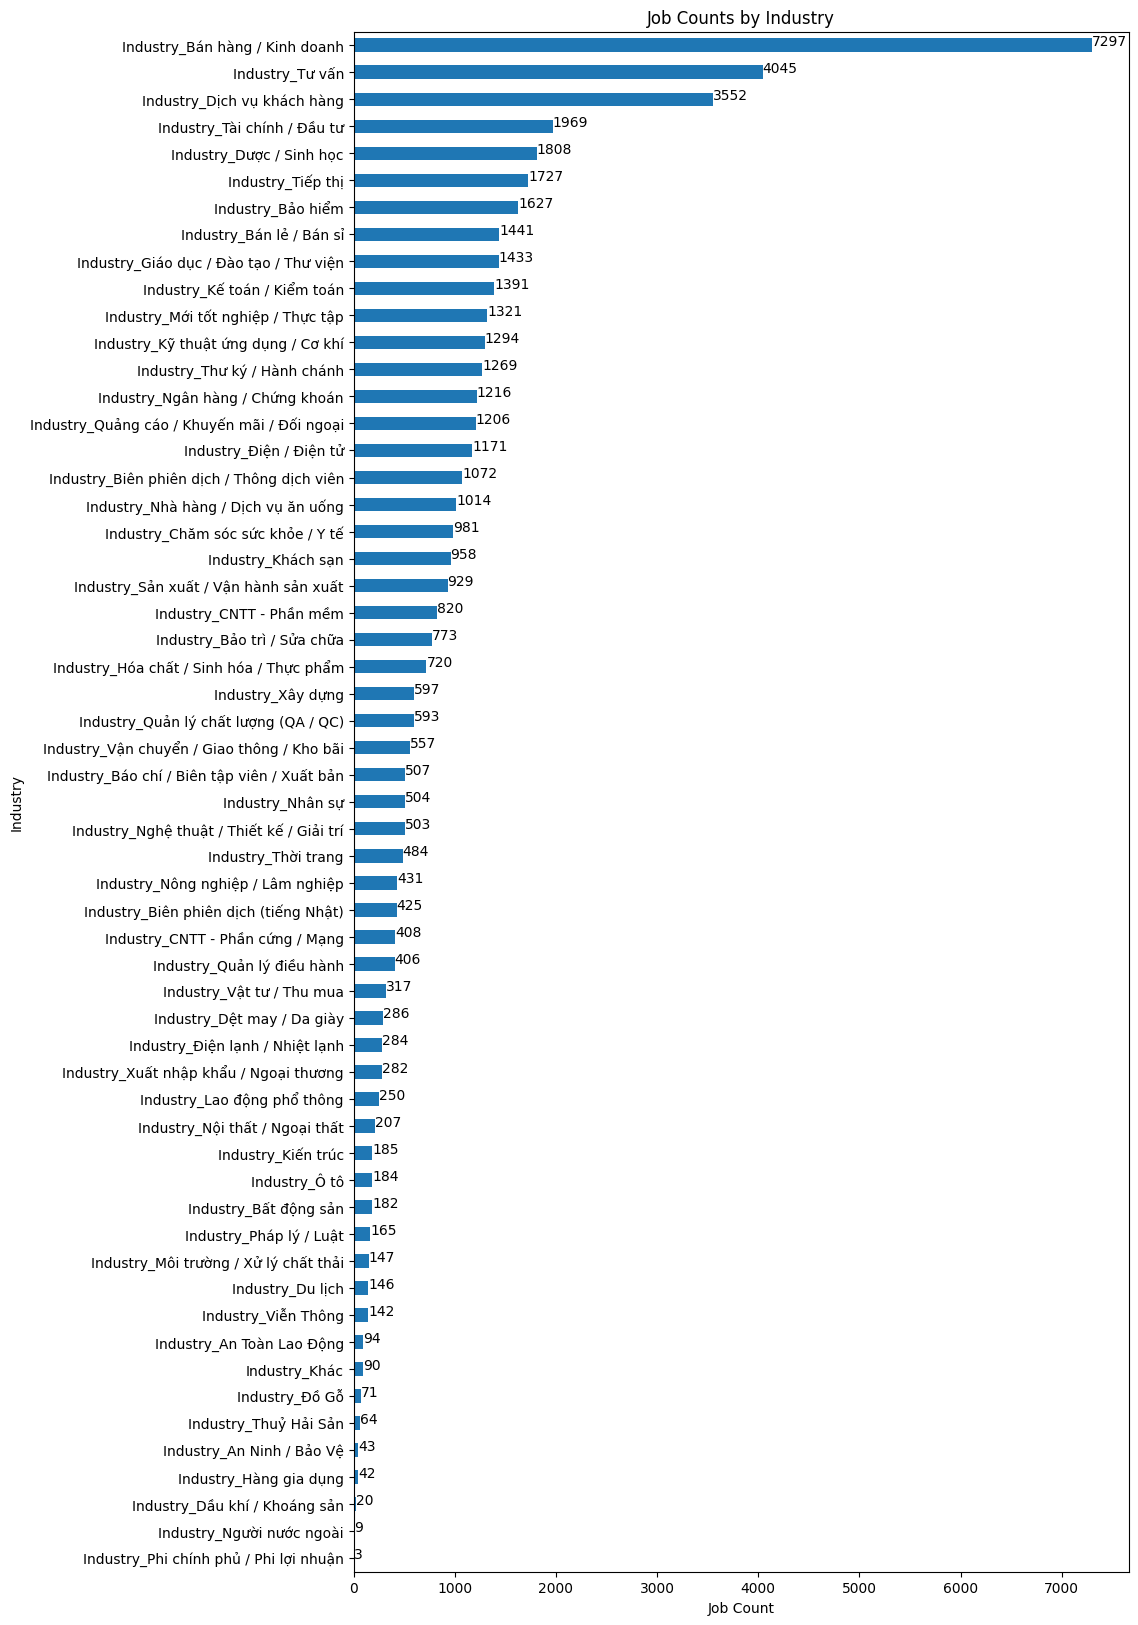

In [7]:
industry_columns = [col for col in career_link.columns if col.startswith('Industry_')]

# Sum each industry column to get job counts
industry_counts = career_link[industry_columns].sum()

# Sort the counts in descending order
industry_counts = industry_counts.sort_values(ascending=True)

# Create a horizontal bar plot to visualize job counts for each industry
plt.figure(figsize=(10, 20))
industry_counts.plot(kind='barh')  # Use 'barh' for horizontal bar chart
plt.title('Job Counts by Industry')
plt.ylabel('Industry')
plt.xlabel('Job Count')

for index, value in enumerate(industry_counts):
    plt.text(value, index, str(value))

plt.show()

## Most appeared words in Required Skills

In [6]:
keyword = 'CNTT'
# Filter job listings where the job title contains a keyword
filtered_jobs = career_link[career_link['Industry'].str.contains(keyword, case=False, na=False)]

KeyError: 'Industry'

In [1]:
import os
import re
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from underthesea import word_tokenize
from underthesea import text_normalize

from wordcloud import WordCloud

# Define the path to the stopwords file
stopWordsPath = 'vietnamese-stopwords.txt'  # Replace with the actual path to your stopwords file

def preprocessing(text):

    
    text_pre = text.replace("\n","")  # Remove the newline command
    text_pre = re.sub(r'[^\w\s]', '', text_pre)  # Remove all non-word characters except spaces
    text_pre = text_pre.lower() # Convert text to lowercase
    text_pre=re.sub(r'[^\w\s]','',text_pre) # Remove punctuation
    text_pre = re.sub("\d+", " ", text_pre) # Remove number
    text_pre = re.sub(r"[!@#$[]()]'-", "", text_pre) # Remove character: !@#$[]()
    
    text_pre = word_tokenize(text_pre, format="text")
    
    text_pre = text_normalize(text_pre)
    
    
    
    ##Remove stop words
    f = open(stopWordsPath, "r", encoding="utf-8")
    
    #Get Stop words Dictionaries
    List_StopWords=f.read().replace(' ', '_')
    List_StopWords=List_StopWords.split("\n")
    text_pre=" ".join(text for text in text_pre.split() if text not in List_StopWords)
    
    # For English
    stop = stopwords.words('english')   # Remove StopWords
    text_pre = " ".join(text_pre for text_pre in text_pre.split() if text_pre not in stop)
    
    return text_pre.split()

def explore_text(preprocessedText, filePath):
    print("Number of words: ", len(preprocessedText))
    # Compute the frequency of all words
    frequency_dist = FreqDist(word.lower() for word in preprocessedText)

    # Show only the top 50 results
    print(frequency_dist.most_common(50))

    # Consider words with length greater than 3 and plot
    large_words = dict([(k, v) for k, v in frequency_dist.items() if len(k) > 0])
    frequency_dist = nltk.FreqDist(large_words)
    frequency_dist.plot(50, cumulative=False)

    # Save the plot
    plt.savefig(filePath + '_plot.png')

    wcloud = WordCloud().generate_from_frequencies(frequency_dist)

    # Save the word cloud
    wcloud.to_file(filePath + '_wordcloud.png')

    # Plotting the word cloud
    plt.imshow(wcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

ModuleNotFoundError: No module named 'underthesea'

Number of words:  28470
[('kinh_nghiệm', 936), ('n', 480), ('kiến_thức', 442), ('giao_tiếp', 320), ('trở', 301), ('tiếng', 290), ('experience', 286), ('chuyên_ngành', 281), ('công_nghệ', 234), ('hệ_thống', 214), ('quản_lý', 197), ('phần_mềm', 171), ('lập_trình', 171), ('phát_triển', 170), ('đại_học', 152), ('thiết_kế', 152), ('hiểu_biết', 152), ('học_hỏi', 151), ('công_nghệ_thông_tin', 131), ('sản_phẩm', 126), ('tương_đương', 126), ('knowledge', 120), ('skills', 113), ('yêu_thích', 113), ('trách_nhiệm', 108), ('năng_động', 103), ('lĩnh_vực', 102), ('dự_án', 102), ('am_hiểu', 102), ('phân_tích', 97), ('kỹ_thuật', 97), ('years', 96), ('good', 96), ('ngành', 96), ('nam', 96), ('độc_lập', 95), ('ham', 95), ('rõ_ràng', 95), ('cntt', 94), ('ngôn_ngữ', 94), ('cao_đẳng', 93), ('chịu_khó', 93), ('nhật', 92), ('khách_hàng', 92), ('hệ', 91), ('sql', 88), ('ngoại_hình', 88), ('cập_nhật', 88), ('quản_trị', 87), ('ưa', 87)]


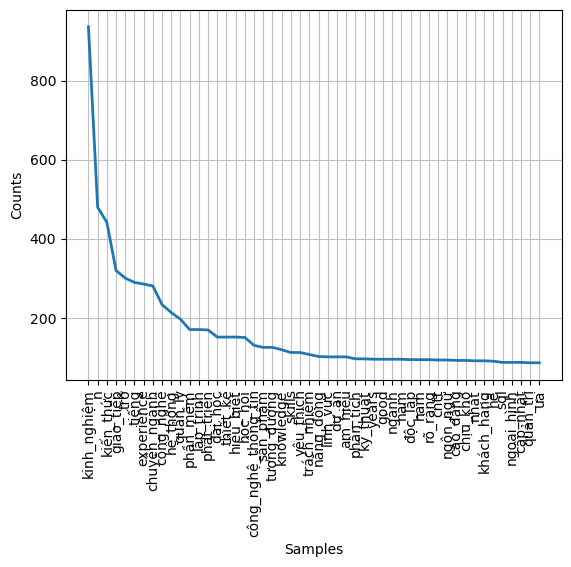

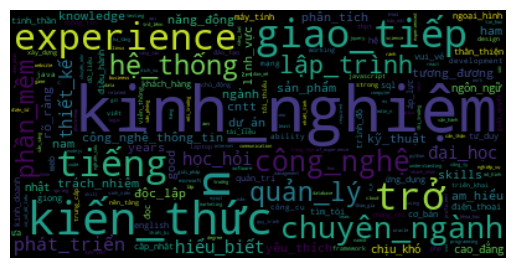

In [ ]:
keyword = 'CNTT'
filtered_jobs = career_link[career_link['Industry'].str.contains(keyword, case=False, na=False)]

job_descriptions = ' '.join(filtered_jobs['Required Skills'])

preprocessed_text = preprocessing(job_descriptions)
current_directory = os.getcwd()

explore_text(preprocessed_text, current_directory)